# Hierarchical clustering

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import math

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import silhouette_score

In [96]:
def show3D(X, Y, Z, color='blue'):
    fig = go.FigureWidget()
    fig.add_scatter3d(x=X, y=Y, z=Z,mode = 'markers', marker={'color': color})
    fig.update_traces(marker_size = 3)
    fig.update_layout(width=700, height=700)
    fig.show()

In [ ]:
def show3DClusters(X, Y, Z, colors, nClusters):
    fig = go.FigureWidget()
    fig.add_scatter3d(x=X, y=Y, z=Z,mode = 'markers', marker={'color': color})
    fig.update_traces(marker_size = 3)
    fig.update_layout(width=700, height=700)
    fig.show()

In [142]:
def showDendogram(data):
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    dendrogram(data, ax=ax, truncate_mode='lastp', p=30, leaf_rotation=50)
    ax.set_xlabel('Distance')
    ax.set_ylabel('Points')
    ax.set_title('Dendogram')
    plt.show()

In [151]:
colors = ['red', 'blue', 'green', 'black', 'yellow']

In [129]:
df = pd.read_csv('../data/all_preprocessed.csv')
df.head()

,author,content,poem name,age,type,age_type
0,william shakespeare,let the bird of loudest layon the sole arabian...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
1,duchess of newcastle margaret cavendish,sir charles into my chamber coming in when i w...,An Epilogue to the Above,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
2,thomas bastard,our vice runs beyond all that old men saw and ...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
3,edmund spenser,lo i the man whose muse whilome did maske as ...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
4,richard barnfield,long have i longd to see my love againe still ...,Sonnet 16,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore


In [130]:
df['content']

0      let the bird of loudest layon the sole arabian...
1      sir charles into my chamber coming in when i w...
2      our vice runs beyond all that old men saw and ...
3      lo i the man  whose muse whilome did maske as ...
4      long have i longd to see my love againe still ...
                             ...                        
568    with the man i love who loves me not i walked ...
569    hart crane   voyages i  ii  iii  iv  v  vi  fr...
570    when you are old and grey and full of sleep an...
571    give me hunger o you gods that sit and givethe...
572    potuia  potuiawhite grave goddess pity my sadn...
Name: content, Length: 573, dtype: object

In [131]:
tfidfVectorizer = CountVectorizer()
vectorizedContent = tfidfVectorizer.fit_transform(df['content'])

In [132]:
finalData = pd.DataFrame(vectorizedContent.toarray(), columns=tfidfVectorizer.get_feature_names_out())
finalData.head()

,10,13,1538,19,1904,1914,1917,1919,1921,1922,...,yvory,ywis,zeal,zealous,zenophontes,zephyrs,zephyrus,zeus,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
pca = PCA(n_components=3)
reducedData = pca.fit_transform(finalData)
reducedData

array([[15.09289674, -6.97958285, -0.03190248],
       [-6.39776484,  3.10117176, -0.08647126],
       [-7.60993045,  0.75892905,  0.14171861],
       ...,
       [-1.94527462, -2.09706779,  1.02971904],
       [-1.1098533 , -3.1973134 ,  0.36731146],
       [-1.70511985, -4.21120089,  0.60547857]])

Lets take a look how our reduced data looks in 3D space:

In [134]:
show3D(reducedData[0:, 0], reducedData[0:, 1], reducedData[0:, 2], 'blue')

Dendogram using Wards method:

In [135]:
wX = linkage(reducedData, method='ward')

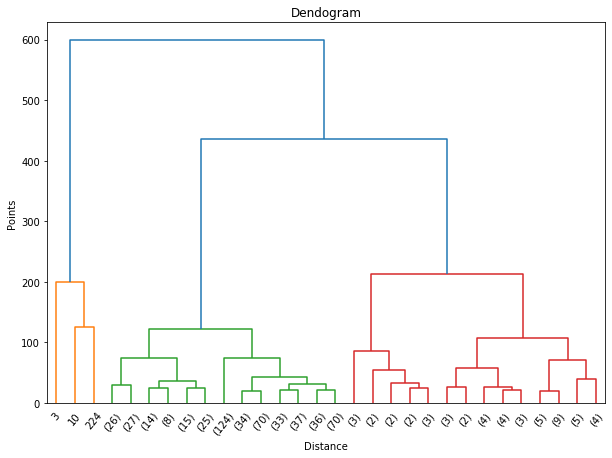

In [136]:
showDendogram(wX)

In [ ]:
ks = [2, 3, 4, 5, 6]
linkages = ['ward', 'complete', 'average', 'single']

options = np.array(np.meshgrid(ks, linkages)).T.reshape(-1, 2)

fig = plt.figure(figsize=(15,30))
for i, (c, linkage) in enumerate(options):
    k = int(c)
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(reducedData)
    
    fig.add_subplot(len(options) / 3, 3, i+1)
    
    for cluster_label in range(k):
        cluster = reducedData[model.labels_ == cluster_label]
        plt.scatter(cluster[0:, 0], cluster[0:, 1])
    plt.title(f'sil={silhouette_score(reducedData, model.labels_)}')

In [154]:
ks = [2, 3, 4]
linkages = ['ward']

options = np.array(np.meshgrid(ks, linkages)).T.reshape(-1, 2)

fig = plt.figure(figsize=(15,30))
for i, (c, linkage) in enumerate(options):
    k = int(c)
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(reducedData)
    
    fig = go.FigureWidget()
    
    for cluster_label in range(k):
        cluster = reducedData[model.labels_ == cluster_label]
        fig.add_scatter3d(x=cluster[0:, 0], y=cluster[0:, 1], z=cluster[0:, 2], mode = 'markers', marker={'color': colors[cluster_label]})
    fig.update_traces(marker_size = 3)
    fig.update_layout(width=700, height=700)
    fig.show()

<Figure size 1080x2160 with 0 Axes>